In [ ]:
'''
Explanation of the code:

1. First, we import the necessary libraries - pandas, numpy, matplotlib, and seaborn.
2. Next, we read the dataset into a pandas dataframe.
3. We then perform Exploratory Data Analysis (EDA) by checking the shape of the dataset, the number of missing values, 
   the datatypes of the columns, and the descriptive statistics of the dataset. We also plot a correlation heatmap to 
   check for correlations between the variables.
4. Next, we perform Data Cleaning by checking for duplicates, removing outliers, converting the 'time' column to 
   datetime format, setting the 'id' column as the index, and renaming some columns. Finally, we save the cleaned dataset 
   to a new CSV file.
   
'''

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset
df = pd.read_csv("iot_dataset.csv")

Shape of the dataset: (928991, 12)
Number of missing values:
 id          0
time        0
R1          0
R2          0
R3          0
R4          0
R5          0
R6          0
R7          0
R8          0
Temp.       0
Humidity    0
dtype: int64
Datatypes of columns:
 id            int64
time        float64
R1          float64
R2          float64
R3          float64
R4          float64
R5          float64
R6          float64
R7          float64
R8          float64
Temp.       float64
Humidity    float64
dtype: object
Descriptive statistics:
                   id           time             R1             R2  \
count  928991.000000  928991.000000  928991.000000  928991.000000   
mean       49.256372       0.403261      12.185350       8.958396   
std        28.453089       0.859865       0.868116       1.558196   
min         0.000000      -0.999999       5.431460       1.820660   
25%        25.000000      -0.320817      11.980000       8.298835   
50%        49.000000       0.366136      

<Axes: >

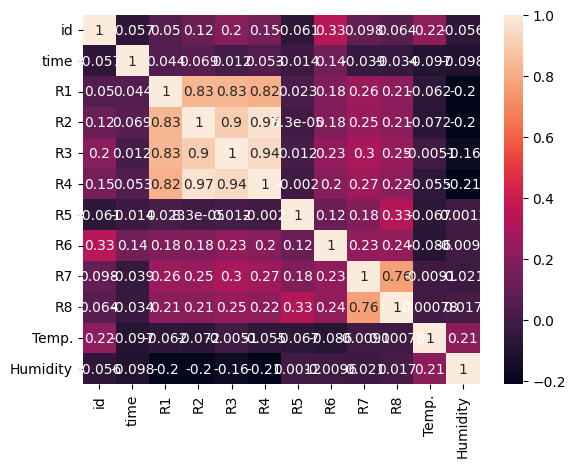

In [3]:
# Exploratory Data Analysis

# Checking the shape of the dataset
print("Shape of the dataset:", df.shape)

# Checking for missing values
print("Number of missing values:\n", df.isna().sum())

# Checking the datatypes of the columns
print("Datatypes of columns:\n", df.dtypes)

# Descriptive statistics of the dataset
print("Descriptive statistics:\n", df.describe())

# Plotting the correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True)


Number of duplicates: 0


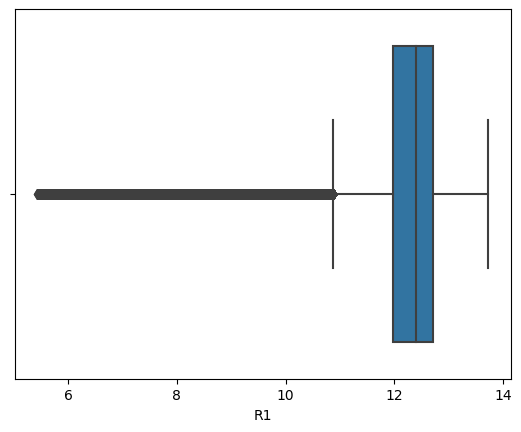

In [4]:
# Data Cleaning

# Checking for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Dropping duplicates
df = df.drop_duplicates()

# Checking for outliers
sns.boxplot(x=df['R1'])

# Removing outliers
q1 = df['R1'].quantile(0.25)
q3 = df['R1'].quantile(0.75)
iqr = q3 - q1
df = df[(df['R1'] > q1 - 1.5 * iqr) & (df['R1'] < q3 + 1.5 * iqr)]

# Converting the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Setting 'id' column as index
df = df.set_index('id')

# Renaming columns
df = df.rename(columns={'Temp.': 'Temperature'})

In [5]:
# Saving cleaned dataset to a new CSV file
df.to_csv("cleaned_iot_dataset.csv", index=True)